- https://shap.readthedocs.io/en/latest/tabular_examples.html
- https://altair-viz.github.io/gallery/index.html
- https://github.com/parrt/dtreeviz/
- https://airbnb.io/visx/gallery
- https://bokeh.org/
- https://holoviews.org/gallery/index.html
- https://vedo.embl.es/#gallery

- https://towardsdatascience.com/10-amazing-machine-learning-visualizations-you-should-know-in-2023-528282940582#9389


In [1]:
import pandas as pd
import numpy as np

In [51]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [52]:
from lightgbm import LGBMRegressor

# Feature-engine's modules for feature egineering
from feature_engine import creation
from feature_engine import discretisation as disc
from feature_engine import encoding as enc
from feature_engine import imputation as imp
from feature_engine import selection as sel

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from lightgbm import LGBMRegressor


In [2]:
small = pd.read_csv('woman_small.csv')
big = pd.read_csv('womam_big.csv')

In [3]:
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947 entries, 0 to 8946
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      8947 non-null   int64  
 1   Name    8947 non-null   object 
 2   Sex     8947 non-null   object 
 3   Age     8867 non-null   float64
 4   Height  7586 non-null   float64
 5   Weight  7523 non-null   float64
 6   Team    8947 non-null   object 
 7   NOC     8947 non-null   object 
 8   Games   8947 non-null   object 
 9   Year    8947 non-null   int64  
 10  Season  8947 non-null   object 
 11  City    8947 non-null   object 
 12  Sport   8947 non-null   object 
 13  Event   8947 non-null   object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.0+ MB


In [4]:
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      653 non-null    int64  
 1   Name    653 non-null    object 
 2   Sex     653 non-null    object 
 3   Age     647 non-null    float64
 4   Height  498 non-null    float64
 5   Weight  495 non-null    float64
 6   Team    653 non-null    object 
 7   NOC     653 non-null    object 
 8   Games   653 non-null    object 
 9   Year    653 non-null    int64  
 10  Season  653 non-null    object 
 11  City    653 non-null    object 
 12  Sport   653 non-null    object 
 13  Event   653 non-null    object 
 14  Medal   653 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 76.6+ KB


In [5]:
big.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,All-Around,NaN
1,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Team,Silver
2,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Floor,NaN
3,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Vault,NaN
4,394,Irene Abel,F,19.0,160.0,48.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Uneven Bars,NaN


In [6]:
 big["Medal"].value_counts()

Gold      220
Silver    217
Bronze    216
Name: Medal, dtype: int64

In [8]:
main_label = 'Medal'
big[main_label] = (big[main_label].isin(['Gold', 'Silver', 'Bronze'])).astype(int)

In [9]:
# fill nan and group columns
def fill_nan_group(x, delta=5):
    if x == 'None':
        return x
    return str(delta*round(1/delta*x))

In [10]:
big['Age'] = big['Age'].fillna('None').apply(lambda x: fill_nan_group(x, delta=5))
big['Weight'] = big['Weight'].fillna('None').apply(lambda x: fill_nan_group(x, delta=20))
big['Height'] = big['Height'].fillna('None').apply(lambda x: fill_nan_group(x, delta=10))

In [16]:
import sys
sys.path

['/Users/ryantalbot/Desktop/MSDS/Core/Data Mining Foundations/Data Mining Project/Project/competition_gym2023/kaggle-data',
 '/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python39.zip',
 '/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9',
 '/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/lib-dynload',
 '',
 '/Users/ryantalbot/.local/lib/python3.9/site-packages',
 '/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages',
 '/Users/ryantalbot/.local/lib/python3.9/site-packages/IPython/extensions',
 '/Users/ryantalbot/.ipython']

In [17]:
# /Users/yufeng/anaconda3/envs/py33/bin/python -m pip install plotly

# /Users/ryantalbot/opt/anaconda3/envs/tf2/bin/python3 -m pip install -q feature_engine

In [18]:
!pip install -q feature_engine

^C
ERROR: Operation cancelled by user


In [19]:
from feature_engine.encoding import RareLabelEncoder

In [22]:
# set up the rare label encoder limiting number of categories to max_n_categories
for col in ['Team']:
    big[col] = big[col].fillna('None')
    encoder = RareLabelEncoder(n_categories=1, max_n_categories=70, replace_with='Other', tol=30/big.shape[0])
    big[col] = encoder.fit_transform(big[[col]])


In [24]:
big.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [28]:
big

,ID,Sex,Age,Height,Weight,Team,Year,Season,Sport,Medal
0,394,F,20,160,40,East Germany,1972,Summer,Gymnastics,0
1,394,F,20,160,40,East Germany,1972,Summer,Gymnastics,1
2,394,F,20,160,40,East Germany,1972,Summer,Gymnastics,0
3,394,F,20,160,40,East Germany,1972,Summer,Gymnastics,0
4,394,F,20,160,40,East Germany,1972,Summer,Gymnastics,0
...,...,...,...,...,...,...,...,...,...,...
8942,135479,F,25,None,None,Yugoslavia,1952,Summer,Gymnastics,0
8943,135479,F,25,None,None,Yugoslavia,1952,Summer,Gymnastics,0
8944,135479,F,25,None,None,Yugoslavia,1952,Summer,Gymnastics,0
8945,135479,F,25,None,None,Yugoslavia,1952,Summer,Gymnastics,0


In [29]:
# drop unused columns
# cols2drop = ['Name', 'NOC', 'City', 'Event', 'Games']
# big = big.drop(cols2drop, axis=1)
print(big.shape)
big.sample(5).T

(8947, 10)


,2352,4835,3508,5876,7004
ID,38702,75841,58478,91006,108175
Sex,F,F,F,F,F
Age,20,15,20,25,20
Height,150,None,160,160,160
Weight,40,None,60,60,60
Team,Spain,Spain,Hungary,Bulgaria,Czechoslovakia
Year,2000,1992,1976,1972,1964
Season,Summer,Summer,Summer,Summer,Summer
Sport,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
Medal,0,0,0,0,0


In [32]:
import shap
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostClassifier
from feature_engine.encoding import RareLabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools

In [34]:
df = big

In [35]:
# initialize data
y = df[main_label].values.reshape(-1,)
X = df.drop([main_label], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4473, 9), (4474, 9), (4473,), (4474,))

In [36]:
# initialize Pool
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)
# specify the training parameters 
model = CatBoostClassifier(iterations=500,
                           depth=5,
                           border_count=23,
                           l2_leaf_reg=0.3,
                           learning_rate=2e-1,
                           verbose=0)

#train the model
model.fit(train_pool)
# make the prediction using the resulting model
y_train_pred = model.predict_proba(train_pool)[:,1]
y_test_pred = model.predict_proba(test_pool)[:,1]
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print(f"ROC AUC score for train {round(roc_auc_train,4)}, and for test {round(roc_auc_test,4)}")

ROC AUC score for train 0.9416, and for test 0.8906


In [37]:
# calculating the baseline ROC AUC score assuming the same probability from training labels to test
roc_auc_baseline = roc_auc_score(y_test, [np.mean(y_train)]*len(y_test))
print(roc_auc_baseline)

0.5


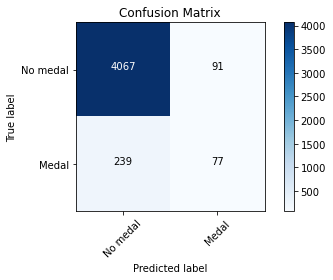

In [38]:
# plotting confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix.
    
    Parameters:
        cm (array-like): Confusion matrix as returned by sklearn.metrics.confusion_matrix.
        classes (list): List of class names, e.g., ['Class 0', 'Class 1'].
        title (str): Title for the plot.
        cmap (matplotlib colormap): Colormap for the plot.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
# Get the confusion matrix
cm = confusion_matrix(y_test, (y_test_pred > 0.5))

# Plot the confusion matrix
class_names = ['No medal', 'Medal'] # positive class should come the last
plot_confusion_matrix(cm, class_names)


(1) SHAP (SHapley Additive exPlanations) values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each player's contribution to the final outcome. In machine learning, each feature is assigned an importance value representing its contribution to the model's output.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

Average medal probability is 0.0706


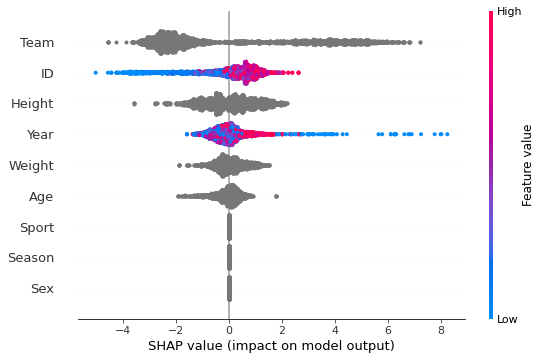

In [39]:
shap.initjs()
ex = shap.TreeExplainer(model)
print(f"Average medal probability is {round(np.mean(y_test),4)}")
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30)


ID



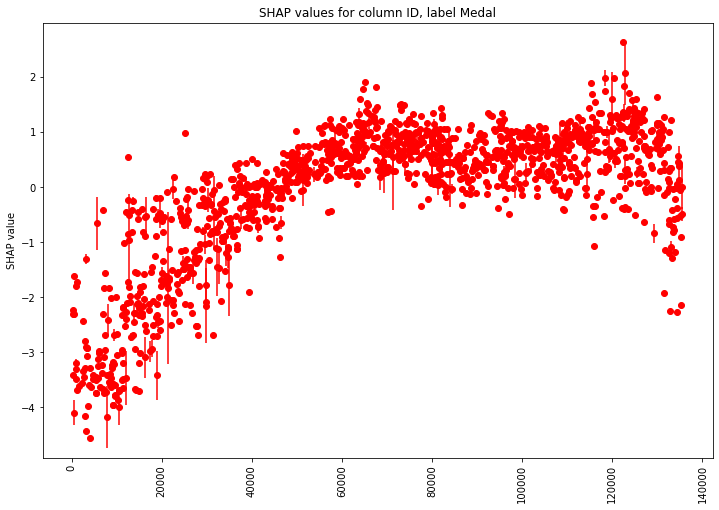

          gain  gain_std  count
col                            
122383  2.6268    0.0000      4
122914  2.0639    0.5652      5
120443  1.9893       NaN      1
118360  1.9751    0.1476      6
65157   1.9154    0.0000      2
...        ...       ...    ...
610    -4.0995    0.2213      7
3081   -4.1542    0.0000      2
7769   -4.1791    0.5603      4
3267   -4.4287       NaN      1
4048   -4.5579       NaN      1

[1384 rows x 3 columns]

Sex



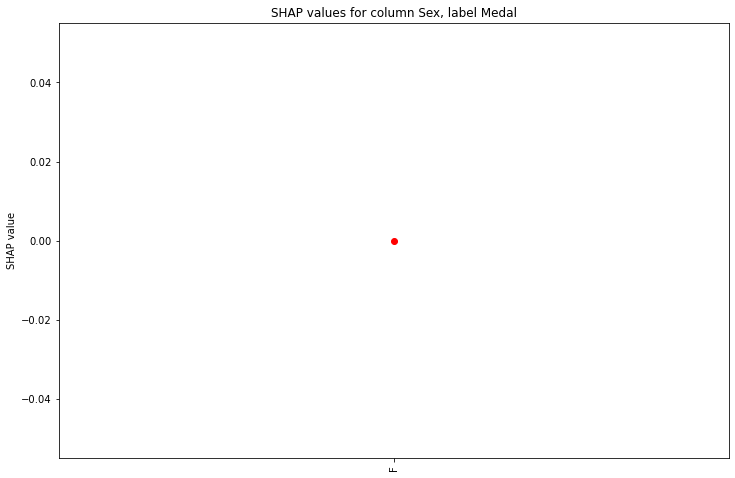

     gain  gain_std  count
col                       
F     0.0       0.0   4474

Age



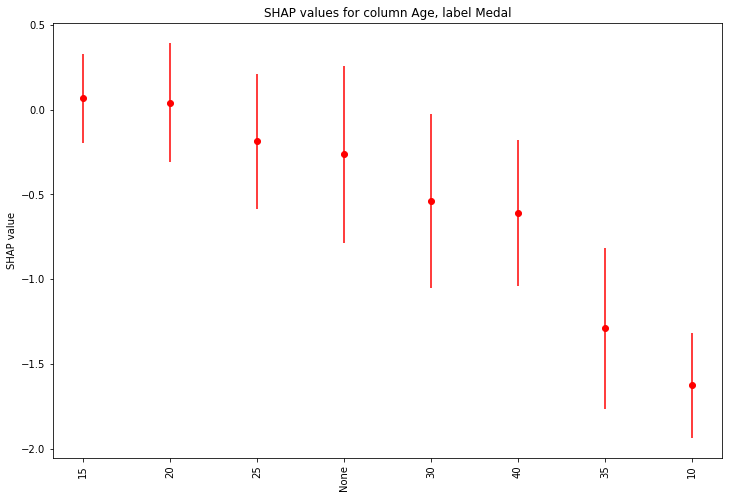

        gain  gain_std  count
col                          
15    0.0672    0.2635   1842
20    0.0428    0.3531   1757
25   -0.1873    0.3970    649
None -0.2639    0.5224     42
30   -0.5385    0.5128    152
40   -0.6081    0.4294      4
35   -1.2900    0.4748     26
10   -1.6271    0.3105      2

Height



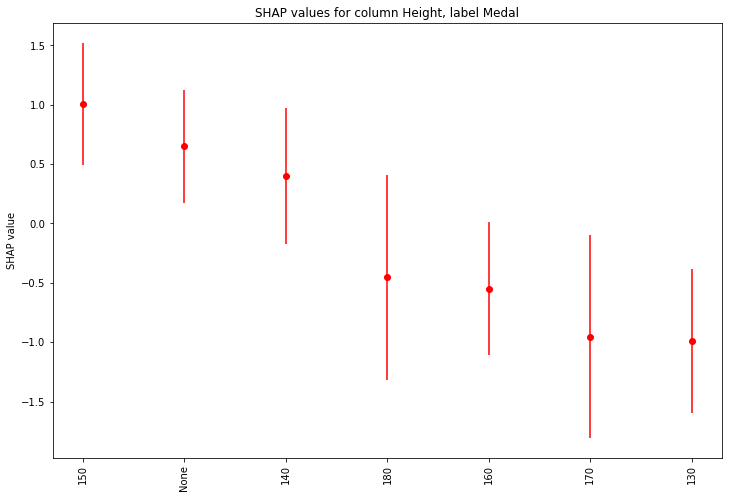

        gain  gain_std  count
col                          
150   1.0065    0.5160   1075
None  0.6497    0.4744    687
140   0.3991    0.5755    279
180  -0.4547    0.8643     15
160  -0.5501    0.5614   2192
170  -0.9542    0.8529    220
130  -0.9911    0.6092      6

Weight



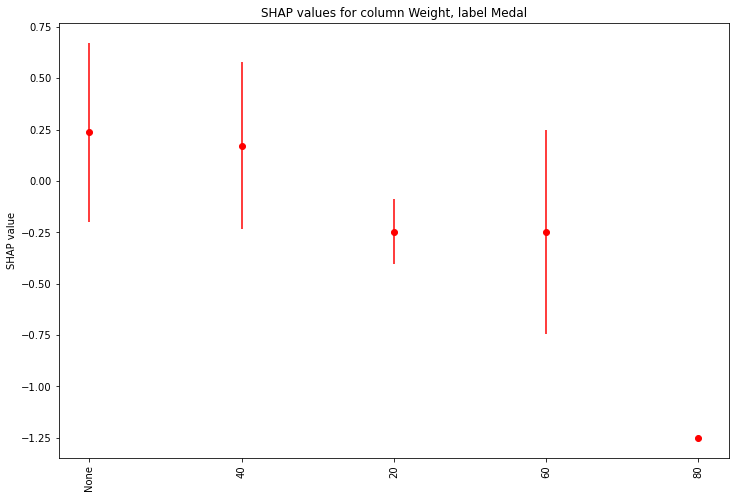

        gain  gain_std  count
col                          
None  0.2358    0.4367    718
40    0.1704    0.4068   2429
20   -0.2477    0.1580      8
60   -0.2490    0.4958   1316
80   -1.2514    0.0000      3

Team



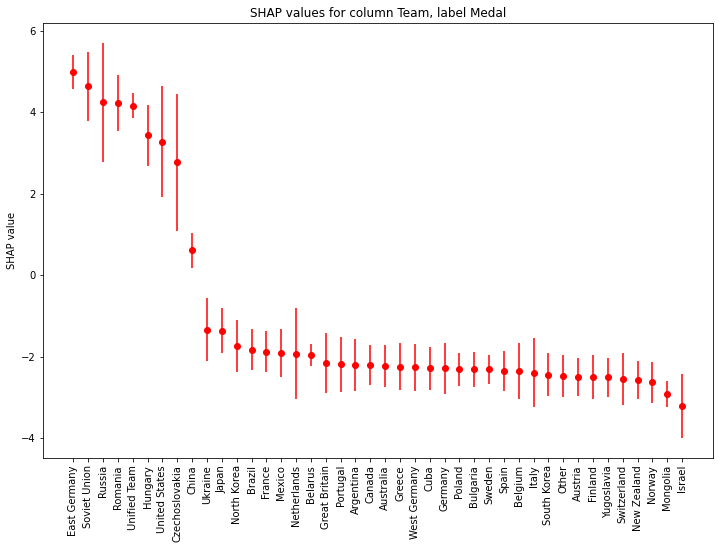

                  gain  gain_std  count
col                                    
East Germany    4.9854    0.4110     85
Soviet Union    4.6304    0.8498    167
Russia          4.2381    1.4622     87
Romania         4.2188    0.6830    269
Unified Team    4.1530    0.3098     18
Hungary         3.4288    0.7492    218
United States   3.2746    1.3601    268
Czechoslovakia  2.7636    1.6876    184
China           0.6045    0.4326    147
Ukraine        -1.3392    0.7782     63
Japan          -1.3591    0.5548    215
North Korea    -1.7336    0.6316     51
Brazil         -1.8256    0.5090     62
France         -1.8822    0.5045    233
Mexico         -1.9140    0.5982     52
Netherlands    -1.9272    1.1214    102
Belarus        -1.9644    0.2752     41
Great Britain  -2.1511    0.7391    202
Portugal       -2.1897    0.6727     30
Argentina      -2.2038    0.6286     19
Canada         -2.2054    0.4948    180
Australia      -2.2255    0.5204    147
Greece         -2.2432    0.5713     37


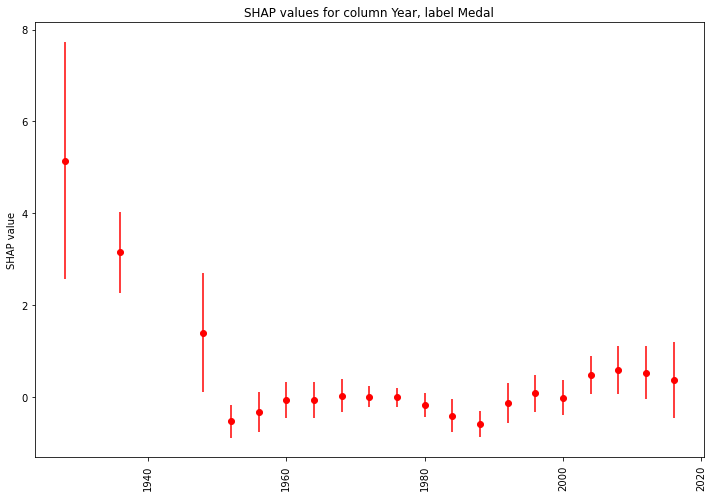

        gain  gain_std  count
col                          
1928  5.1464    2.5806     26
1936  3.1482    0.8815     25
1948  1.4017    1.3061     43
2008  0.5927    0.5205    201
2012  0.5275    0.5805    188
2004  0.4802    0.4122    245
2016  0.3617    0.8253    214
1996  0.0762    0.4093    284
1968  0.0233    0.3617    274
1972  0.0065    0.2368    346
1976 -0.0120    0.2002    246
2000 -0.0149    0.3742    260
1960 -0.0648    0.3861    346
1964 -0.0660    0.3992    264
1992 -0.1341    0.4312    275
1980 -0.1813    0.2576    172
1956 -0.3308    0.4404    200
1984 -0.4144    0.3613    183
1952 -0.5266    0.3597    409
1988 -0.5939    0.2859    273

Season



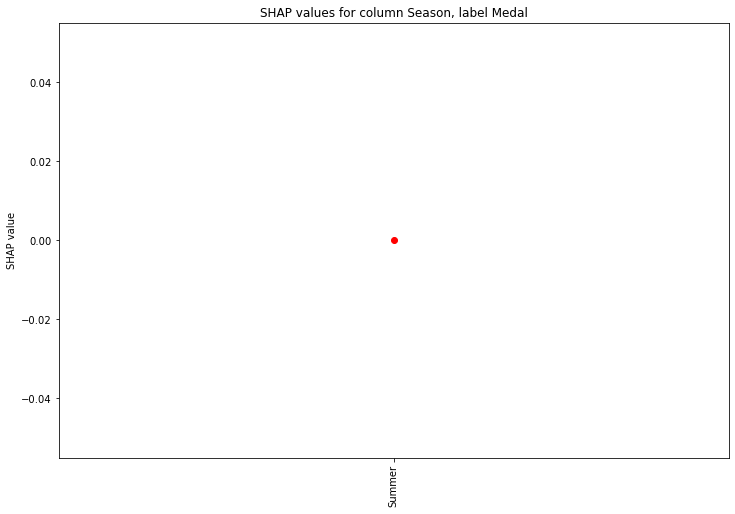

        gain  gain_std  count
col                          
Summer   0.0       0.0   4474

Sport



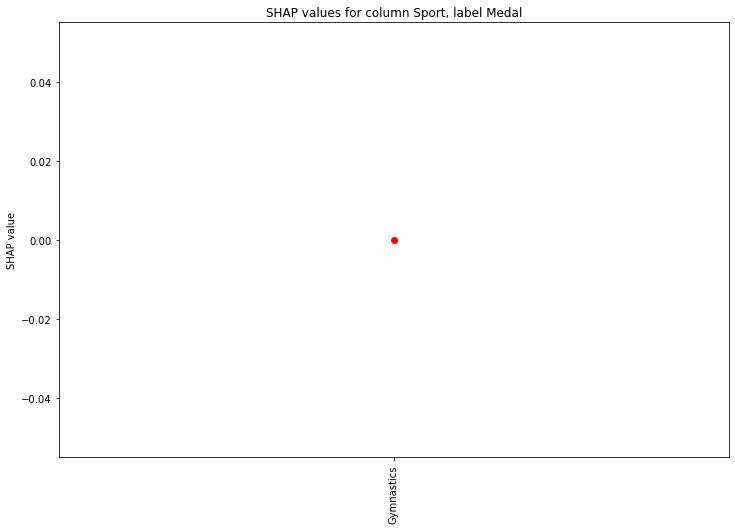

            gain  gain_std  count
col                              
Gymnastics   0.0       0.0   4474


In [40]:
def show_shap(col, shap_values=shap_values, label=main_label, X_test=X_test, ylabel='SHAP value'):
    df_infl = X_test.copy()
    df_infl['shap_'] = shap_values[:,df_infl.columns.tolist().index(col)]
    gain = round(df_infl.groupby(col).mean()['shap_'],4)
    gain_std = round(df_infl.groupby(col).std()['shap_'],4)
    cnt = df_infl.groupby(col).count()['shap_']
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    plt.figure(figsize=(12,8))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    plt.title(f'SHAP values for column {col}, label {label}')
    plt.ylabel(ylabel)
    plt.tick_params(axis="x", rotation=90)
    plt.show();
    print(df_res)
    return

for col in X_test.columns:
    print()
    print(col)
    print()
    show_shap(col, shap_values, label=main_label, X_test=X_test)

(1) https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [61]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

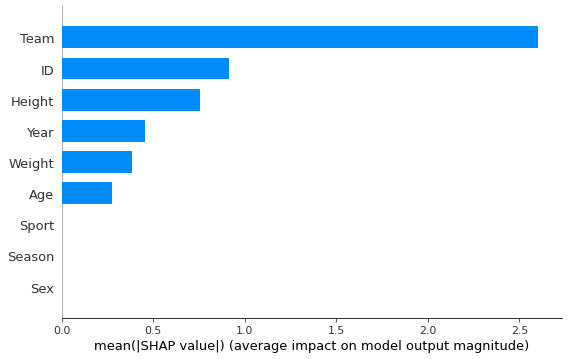

In [63]:
shap.summary_plot(shap_values, X, plot_type='bar')

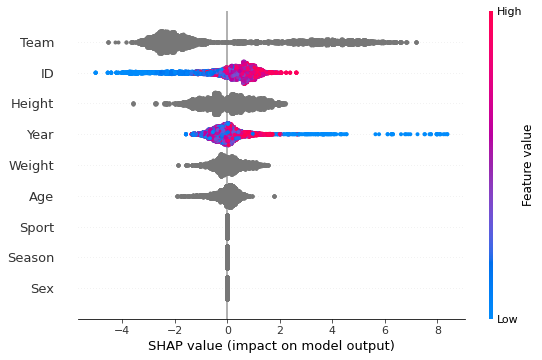

In [64]:
shap.summary_plot(shap_values, X)

In [72]:
import graphviz
import sklearn

In [73]:
single_split_model = sklearn.tree.DecisionTreeRegressor(max_depth=1)
single_split_model.fit(X, y)

ValueError: could not convert string to float: 'F'